In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import time

In [81]:
df = pd.read_csv('weatherHistoryWithRoundValues.csv')

In [82]:
del df['Formatted Date']
del df['Precip Type']
del df['Loud Cover']
del df['Daily Summary']
del df['Apparent Temperature (C)']
del df['Humidity']
del df['Wind Bearing (degrees)']

In [83]:
df = df.drop(df[df['Summary'] == 'Breezy and Mostly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Breezy and Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Humid and Mostly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Breezy and Overcast'].index)
df = df.drop(df[df['Summary'] == 'Humid and Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Windy and Foggy'].index)
df = df.drop(df[df['Summary'] == 'Windy and Overcast'].index)
df = df.drop(df[df['Summary'] == 'Breezy and Foggy'].index)
df = df.drop(df[df['Summary'] == 'Windy and Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Breezy and Dry'].index)
df = df.drop(df[df['Summary'] == 'Dry and Mostly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Windy and Dry'].index)
df = df.drop(df[df['Summary'] == 'Humid and Overcast'].index)
df = df.drop(df[df['Summary'] == 'Dangerously Windy and Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Windy and Mostly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Dry and Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Windy'].index)
df = df.drop(df[df['Summary'] == 'Breezy'].index)
df = df.drop(df[df['Summary'] == 'Rain'].index)
df = df.drop(df[df['Summary'] == 'Partly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Mostly Cloudy'].index)
df = df.drop(df[df['Summary'] == 'Dry'].index)
df = df.drop(df[df['Summary'] == 'Light Rain'].index)
df = df.drop(df[df['Summary'] == 'Drizzle'].index)

df = df.reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34635 entries, 0 to 34634
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Summary               34635 non-null  object 
 1   Temperature (C)       34635 non-null  float64
 2   Wind Speed (km/h)     34635 non-null  float64
 3   Visibility (km)       34635 non-null  float64
 4   Pressure (millibars)  34635 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.3+ MB


In [74]:
listofvalues = df['Summary'].unique().tolist()
for value in listofvalues:
    count = df['Summary'].str.contains(value).sum()
    print(value, " wystepuje: ", count)

Overcast  wystepuje:  16597
Foggy  wystepuje:  7148
Clear  wystepuje:  10890


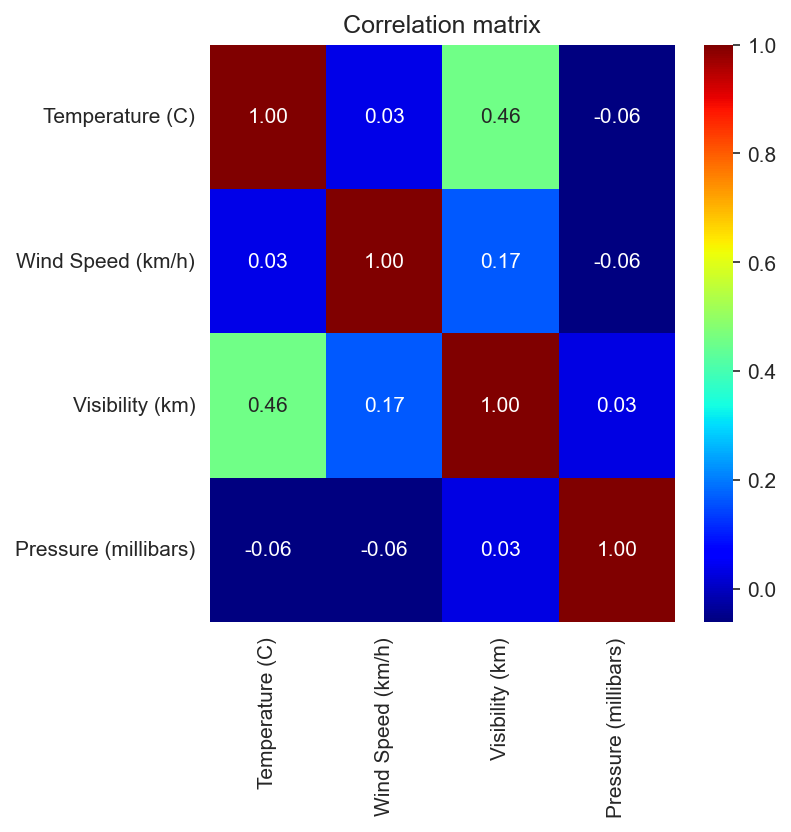

In [75]:
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(df.drop("Summary", axis=1).corr(), annot=True, cmap="jet", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [84]:
y = df.pop("Summary")
X = df

def my_train_test_split(X, y, test_size=0.3, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)
  
    test_size = int(test_size * len(X))
    
    shuffled_indices = np.random.permutation(X.index)      
    indices_train = shuffled_indices[test_size:]
    indices_test = shuffled_indices[:test_size]
    
    X_train = X.iloc[indices_train]
    X_test = X.iloc[indices_test]
    y_train = y.iloc[indices_train]
    y_test = y.iloc[indices_test]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.3)

In [27]:
class KNN:
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors
        
    def __distance_metric(self, point, data):
        return np.sqrt(np.sum((data - point) ** 2, axis=1))        
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        
        for x in X_test.values:
            
            distances = self.__distance_metric(x, self.X_train)
            
            indices = np.argsort(distances)[:self.k_neighbors]
            
            labels = [self.y_train.iloc[i] for i in indices]
            result = max(set(labels), key=labels.count)
            
            predictions.append(result)
        
        return predictions
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_test == y_pred) / len(y_test)
        return accuracy


In [96]:
list_of_accuracies = []
for i in range(1,30):
    my_knn = KNN(i)
    my_knn.fit(X_train, y_train)
    list_of_accuracies.append(my_knn.score(X_test, y_test))

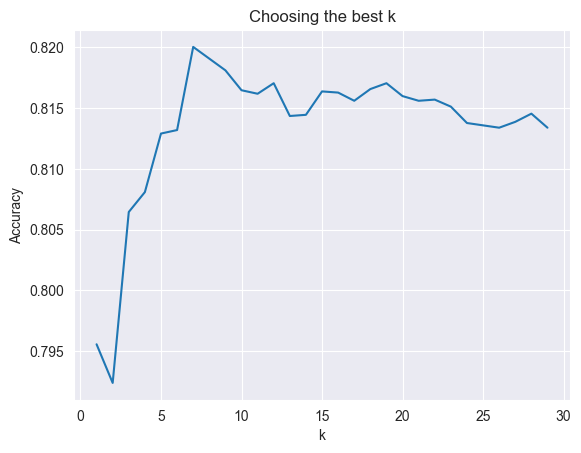

In [103]:
x_data = np.arange(1, 30, 1)
plt.plot(x_data,list_of_accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Choosing the best k')
plt.grid(True)
plt.show()

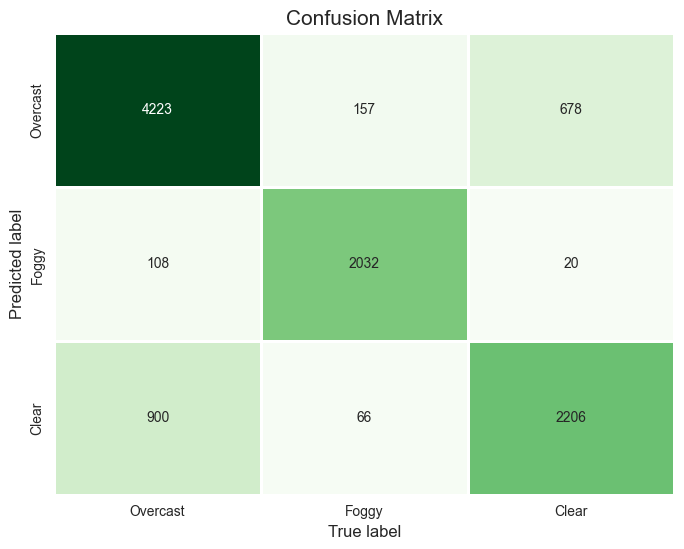

In [98]:
my_knn = KNN(13)
knn_predicitons = my_knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predicitons, labels=listofvalues)
cm_df = pd.DataFrame(cm, index=listofvalues, columns=listofvalues)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='d', linewidths=1, linecolor='white', cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Predicted label', fontsize=12)
plt.xlabel('True label', fontsize=12)

plt.show()

In [28]:
class NaiveBayes:
    def __init__(self):
        self.mean = {}             
        self.var = {}               
        self.class_prior = {}       
        
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)                   # Znalezienie unikalnych wartości y -> ilość różnych klas
        for cls in self.classes:
            X_c = X_train[y_train == cls]                   # Utworzenie tymczasowego podzbioru X'ów należących do tej samej klasy
            self.class_prior[cls] = len(X_c)/len(X_train)   # Obliczenie prawdopodobieństwa prior
            self.mean[cls] = np.mean(X_c, axis=0)           # Obliczenie średniej wszystkich rekordów dla każdej z kolumn (axis=0)
            self.var[cls] = np.var(X_c, axis=0)             # Obliczenie wariancji wszystkich rekordów dla każdej z kolumn (axis=0)
            
    def gauss(self, x, mean, var):                          # Funkcja gęstości Gaussa 
        exponent = np.exp(-(x - mean) ** 2 / (2 * var))
        return 1/np.sqrt(2 * np.pi * var) * exponent
            
    def calculate_posterior(self, x):
        posteriors = {}
        for cls in self.classes:
            prob = np.sum(np.log1p(self.gauss(x, self.mean[cls], self.var[cls])))
            posteriors[cls] = np.log1p(self.class_prior[cls]) + prob
        return posteriors
            
    def predict(self, X_test):
        predictions = []
        for x in X_test.values:
            prob = self.calculate_posterior(x)              # Obliczenie posteriora dla każdej z klas
            predictions.append(max(prob, key=prob.get))     # Dodanie x do klasy o najwyższym współczynniku posterior
        return predictions
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_test == y_pred) / len(y_test)
        return accuracy
    
XBayes_train, XBayes_test, yBayes_train, yBayes_test = my_train_test_split(X, y, test_size=0.3)

In [11]:
my_NaiveBayes = NaiveBayes()
my_NaiveBayes.fit(XBayes_train, yBayes_train)
print(my_NaiveBayes.score(XBayes_test, yBayes_test))

0.6164581328200193


In [12]:
class_probabilities = []
for x in XBayes_test.values:
    prob = my_NaiveBayes.calculate_posterior(x)
    class_probabilities.append(prob)

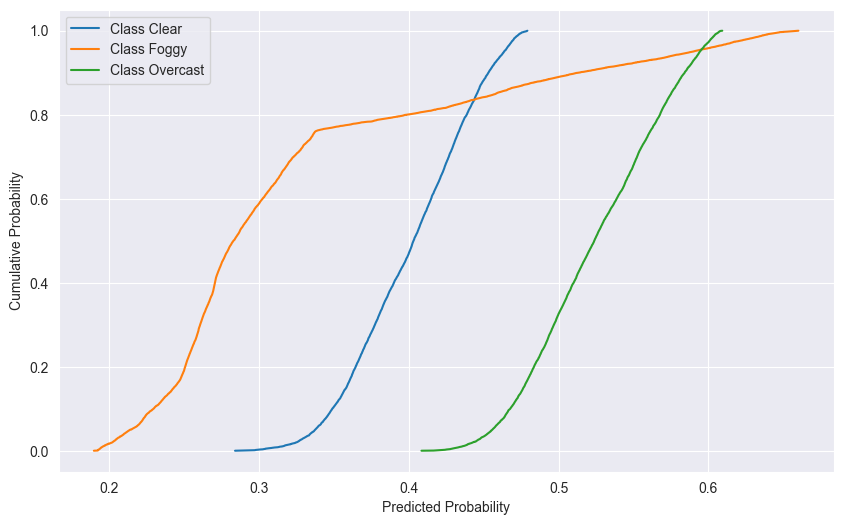

In [13]:
plt.figure(figsize=(10, 6))
for cls in my_NaiveBayes.classes:
    probs = [prob[cls] for prob in class_probabilities]
    sorted_probs = np.sort(probs)
    y = np.arange(1, len(sorted_probs) + 1) / len(sorted_probs)
    plt.plot(sorted_probs, y, label=f'Class {cls}')

plt.title('Cumulative Distribution Function for Naive Bayes Classifier')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn,average='micro')

In [35]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
f1_nb = f1_score(y_test, y_pred_nb,average='micro')

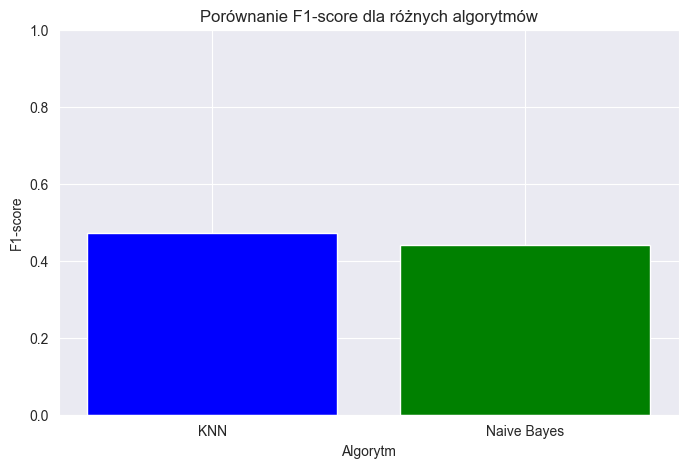

In [36]:
labels = ['KNN', 'Naive Bayes']
f1_scores = [f1_knn, f1_nb]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color=['blue', 'green'])
plt.xlabel('Algorytm')
plt.ylabel('F1-score')
plt.title('Porównanie F1-score dla różnych algorytmów')
plt.ylim(0, 1)
plt.show()

In [111]:
iterations = range(1, 10)

f1_scores_knn = []
f1_scores_nb = []
execution_times_knn = []
execution_times_nb = []

for i in iterations:
    X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.3)
    
    start_time = time.time()
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    execution_time_knn = time.time() - start_time
    f1_scores_knn.append(f1_score(y_test, y_pred_knn,average='micro'))
    execution_times_knn.append(execution_time_knn)
    
    start_time = time.time()
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    execution_time_nb = time.time() - start_time
    f1_scores_nb.append(f1_score(y_test, y_pred_nb,average='micro'))
    execution_times_nb.append(execution_time_nb)


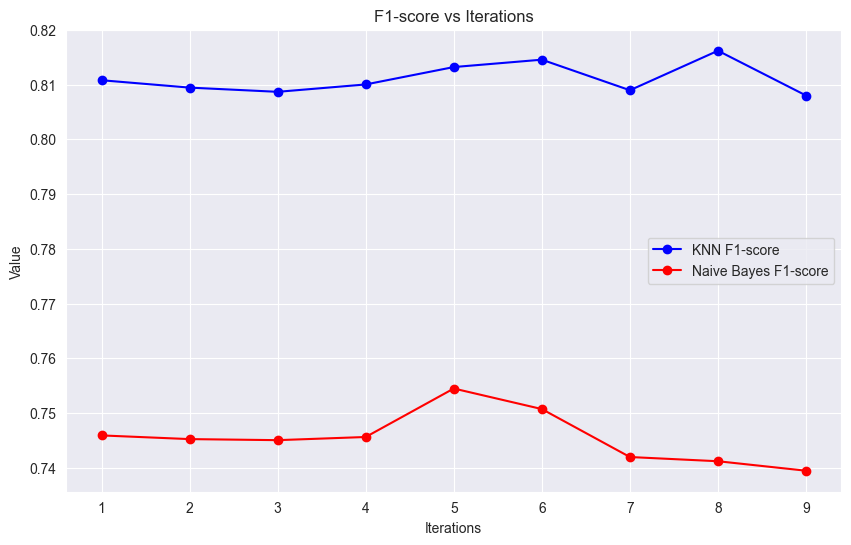

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, f1_scores_knn, label='KNN F1-score', marker='o', color='blue')
plt.plot(iterations, f1_scores_nb, label='Naive Bayes F1-score', marker='o', color='red')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('F1-score vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

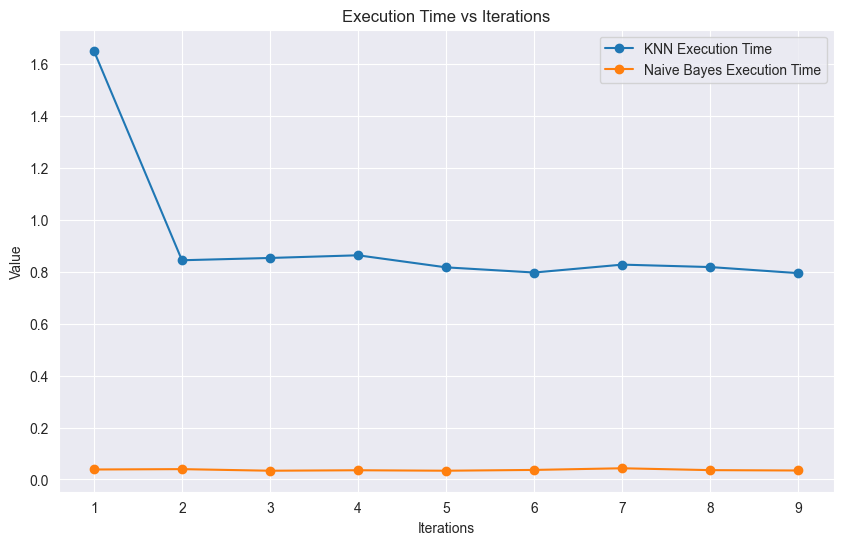

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, execution_times_knn, label='KNN Execution Time', marker='o')
plt.plot(iterations, execution_times_nb, label='Naive Bayes Execution Time', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Execution Time vs Iterations')
plt.legend()
plt.grid(True)
plt.show()